# Étude de la conservation de l'énergie et de la continuité de la température résolue selon la forme de l'équation

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib inline
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
Delta = 10.
lda_1 = 1.
lda_2 = 10.
rho_cp_1 = 1.
rho_cp_2 = 1000.
markers_num = np.array([[0.4 * Delta, 0.6 * Delta]])
alpha = (markers_num[0,1] - markers_num[0,0])/Delta
v = 1.
dt = 1.
fo = 0.5
diff = 0.

t_fin = 1.
dx = 10.**-1.
cfl = 0.5
schema = 'weno'
Formulation = [Problem, ProblemConserv2]
phy_prop = PhysicalProperties(Delta=Delta, diff=diff,lda1=lda_1, lda2=lda_2, rho_cp1=rho_cp_1, rho_cp2=rho_cp_2, alpha=alpha, v=v, dS=0.005**2)
num_prop = NumericalProperties(dx=dx, dt=dt, fo=fo, cfl=cfl, schema=schema, time_scheme='rk4', phy_prop=phy_prop)
markers = Bulles(markers=markers_num, phy_prop=phy_prop, Delta=Delta, n_bulle=1)

## Étude selon la formulation de l'équation

Le premier cas correspond à une formulation en température, les 2 suivant à une formulation en énergie. Dans le premier on utilise $\rho C_p^{n+1}$ dans le 2ième on calcule $\rho C_p^* = \rho C_p^n + \Delta t \times \frac{1}{V_{cell}} \int_{S}{\rho C_p^n \underline{v}\cdot \underline{n} dS}$

dt fourier
0.0005000000000000001
convection dE*/dt* = -0.000003
dt fourier
0.0005000000000000001
EC, convection dE*/dt* = 0.000000


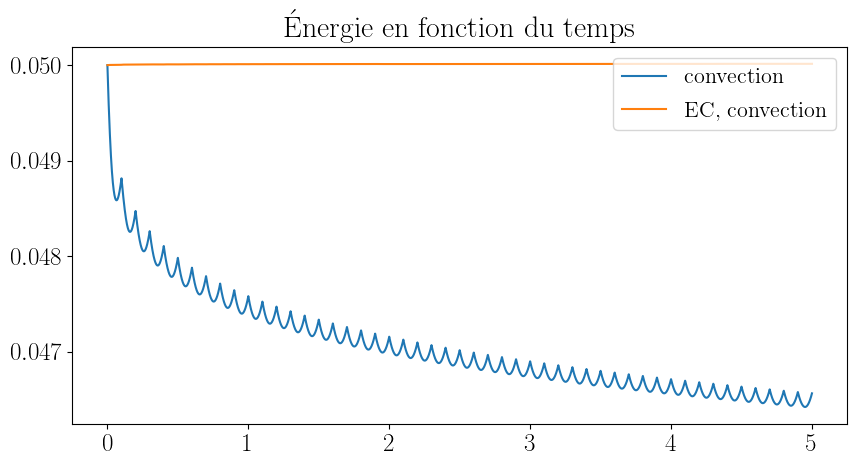

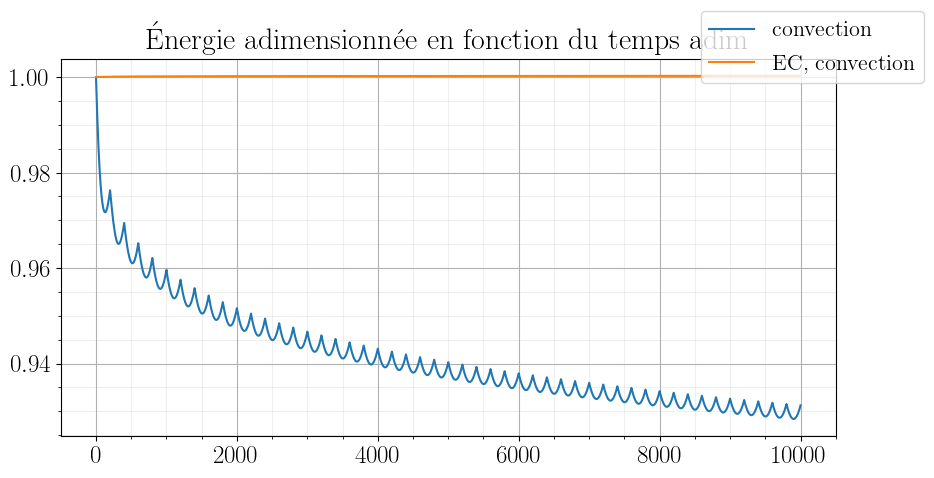

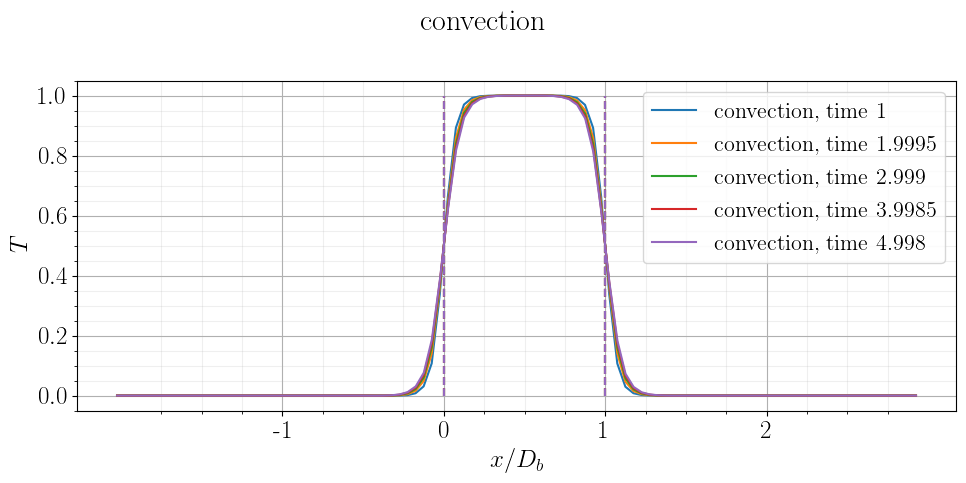

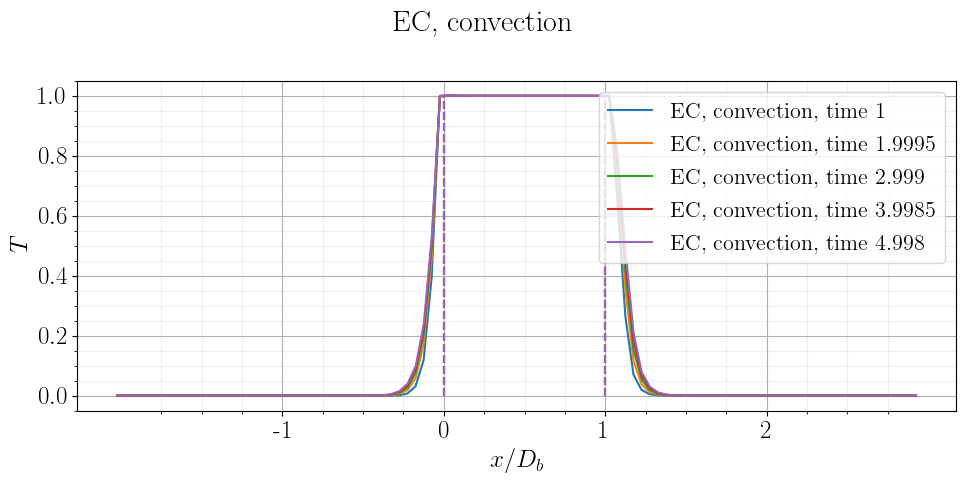

In [4]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(get_T_creneau, phy_prop=phy_prop, num_prop=num_prop, markers=markers)
    E0 = prob.energy
    t, e = prob.timestep(n=10000, number_of_plots=5, debug=None, plotter=Plotter('decale'))
    l = ax1.plot(t, e, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()
ax2.minorticks_on()
ax2.grid(b=True, which='major')
ax2.grid(b=True, which='minor', alpha=0.2)

## Étude de convergence en maillage

dt fourier
0.0005000000000000001
convection dE*/dt* = -0.000005
dt fourier
0.0005000000000000001
EC, convection dE*/dt* = 0.000000
dt fourier
0.00012500000000000003
convection dE*/dt* = -0.000002
dt fourier
0.00012500000000000003
EC, convection dE*/dt* = 0.000000
dt fourier
5e-06
convection dE*/dt* = -0.000000
dt fourier
5e-06
EC, convection dE*/dt* = 0.000000


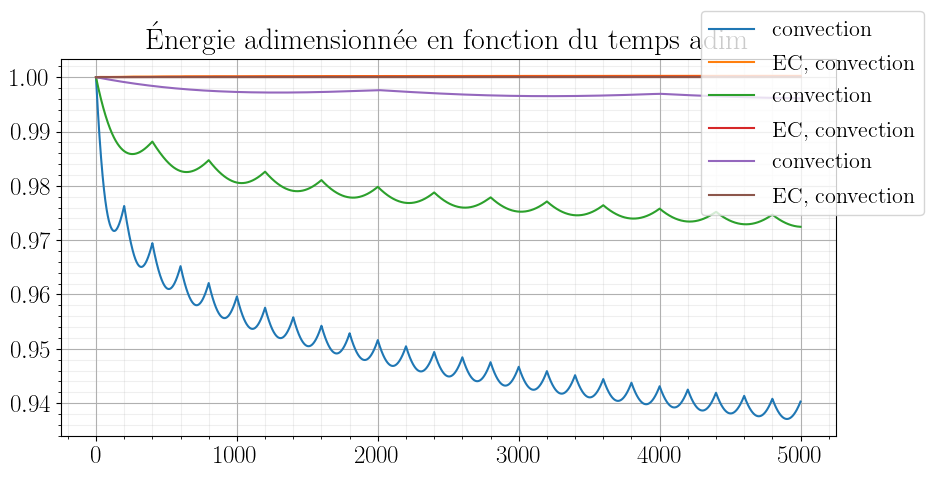

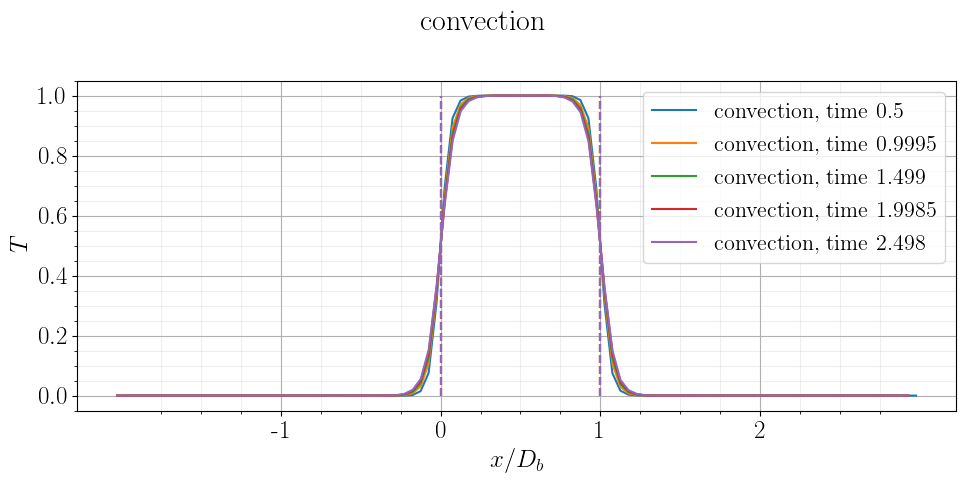

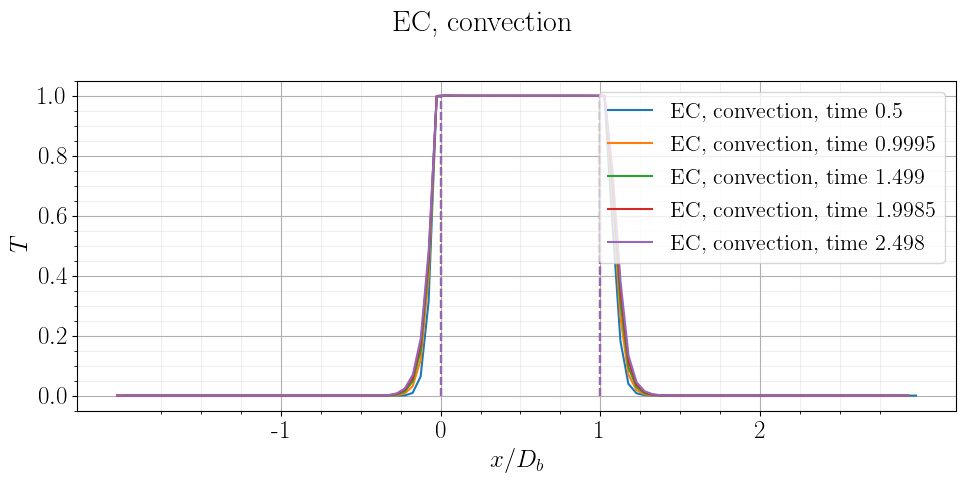

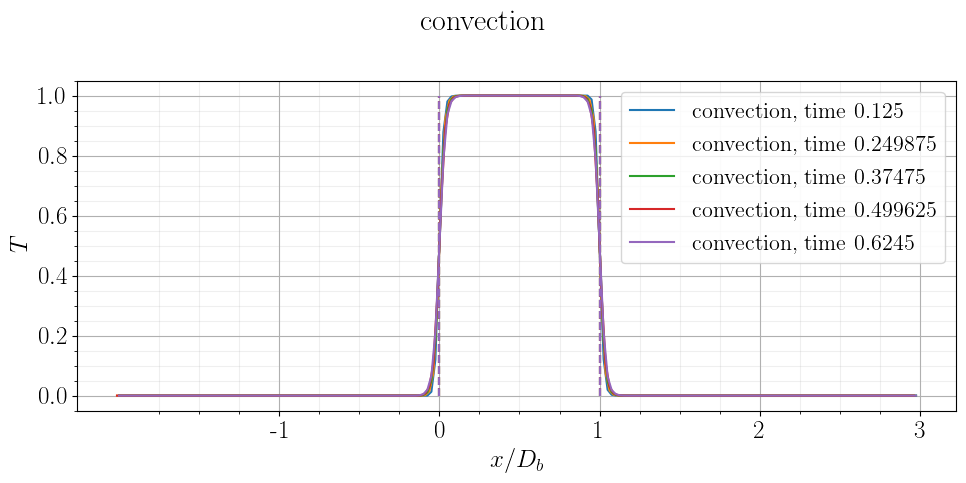

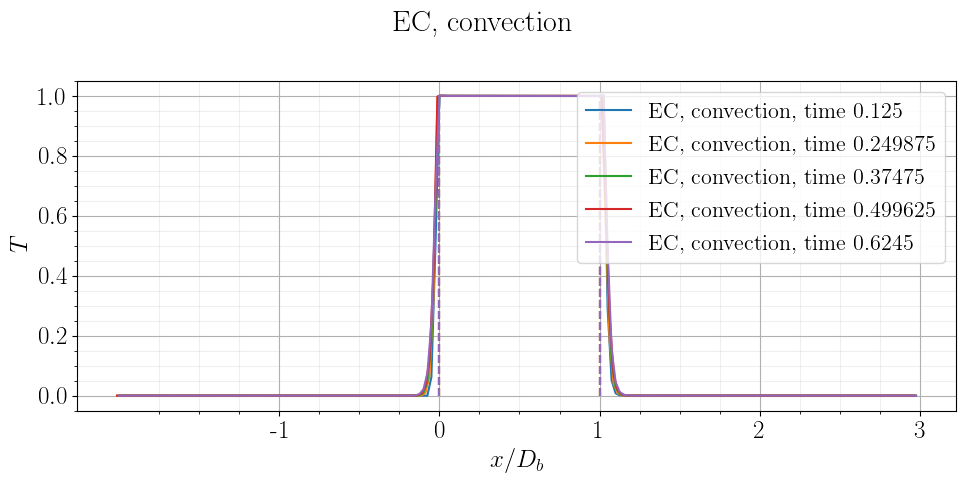

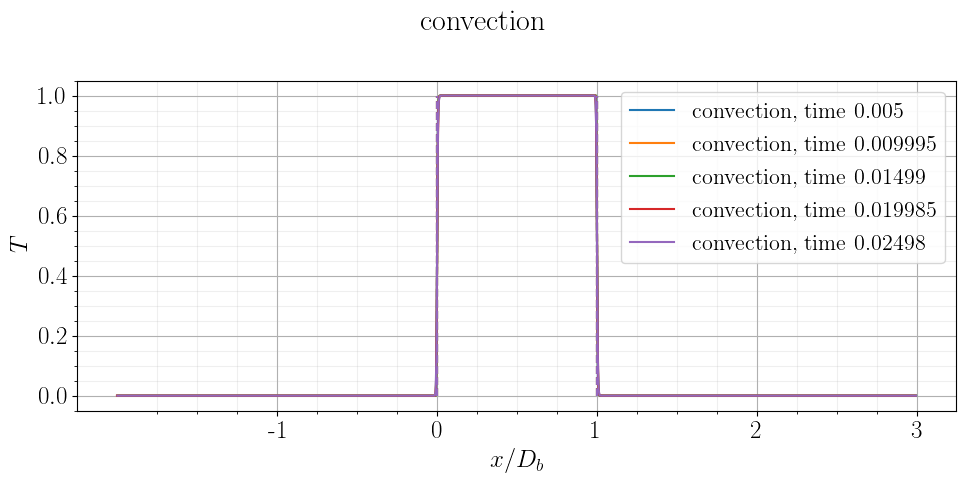

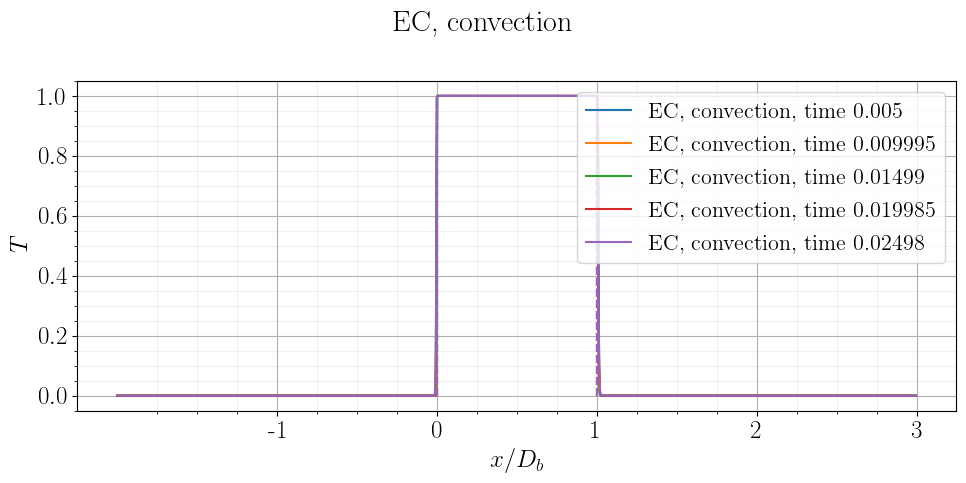

In [6]:
Dx = np.array([0.1, 0.05, 0.01])
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for dx in Dx:
    num_prop = NumericalProperties(dx=dx, dt=dt, fo=fo, cfl=cfl, schema=schema, time_scheme='rk4', phy_prop=phy_prop)
    markers = Bulles(markers=markers_num, phy_prop=phy_prop, Delta=Delta, n_bulle=1)
    for form in Formulation:
        prob = form(get_T_creneau, phy_prop=phy_prop, num_prop=num_prop, markers=markers)
        E0 = prob.energy
        t, e = prob.timestep(n=5000, number_of_plots=5, debug=None, plotter=Plotter('decale'))
        n = len(e)
        i0 = int(n/5)
        ax2.plot(t/prob.dt, e / E0, label=prob.name)
        dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
        # par Dt / rho_cp_l T_l V
        print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()
ax2.minorticks_on()
ax2.grid(b=True, which='major')
ax2.grid(b=True, which='minor', alpha=0.2)